<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C4/C4.html"><img src="../data/C4_nav.png" width="100"  style="float:right;" alt="C4"></a>
<h1>Self-Similarity Matrix (SSM)</h1> 
</div>

<br/>

<p>
To study musical structures and their mutual relations, one general idea is to convert the music signal into a suitable feature sequence and then to compare each element of the feature sequence with all other elements of the sequence. This results in a <strong>self-similarity matrix</strong> (SSM), a tool which is of fundamental importance not only for music structure analysis but also for the analysis of many kinds of time series. Following Section 4.2.1 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>, we introduce in this notebook the concept of SSMs and discuss their fundamental properties. For a more practical approach to this topic, we refer to the <a href="../C4/C4S2_SSM-Synthetic.html">FMP notebook on synthetic generation of SSMs</a>.

<ul>
<li><span style="color:black">
Jouni Paulus, Meinard Müller, and Anssi Klapuri: <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller/publications/2010_PaulusMuellerKlapuri_STAR-MusicStructure_ISMIR.pdf"><strong>Audio-based Music Structure Analysis.</strong></a> Proceedings of the International Conference on Music Information Retrieval (ISMIR), Utrecht, The Netherlands, pp. 625–636, 2010.
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_PaulusMK10_MusicStructure-STAR_ISMIR.txt"> Bibtex </a>
</span></li>
</ul>  

</p> 

## Basic Definition

Let $\mathcal{F}$ be feature space and $s:\mathcal{F}\times\mathcal{F}\to \mathbb{R}$ a similarity measure that makes it possible to compare two elements $x,y\in\mathcal{F}$. Typically, the value $s(x,y)$ is high in case the elements $x,y\in\mathcal{F}$ are similar and small otherwise. Given a feature sequence $X=(x_1,x_2,\ldots,x_N)$, the idea is to compare all elements of the sequence with each other. This results in an $N$-square 
**self-similarity matrix** $\mathbf{S}\in\mathbb{R}^{N\times N}$ defined by 

\begin{equation}
  \mathbf{S}(n,m):=s(x_n,x_m),
\end{equation} 

where $x_n,x_m\in\mathcal{F}$ for $n,m\in[1:N]$. In the following, a tuple $(n,m)\in[1:N]\times[1:N]$ is also called a **cell** of $\mathbf{S}$, and the value $\mathbf{S}(n,m)$ is referred to as **score** of the cell $(n,m)$. Depending on the application context and notion that is used to compare the data, there are many related concepts known under different 
names such as **recurrence plot**, **cost matrix**, or **self-distance matrix** just to name a few. In this notebook, we only consider self-similarity matrices, but the techniques to be explained can easily be transferred to other types of matrices.

Often, even though not necessary, we assume that the feature space is a Euclidean space $\mathcal{F}=\mathbb{R}^K$ of some dimension $K\in\mathbb{N}$. A simple similarity measure $s$ is, for example, the inner product defined by  

\begin{equation}
  s(x,y) := \langle x,y\rangle
\end{equation}

for two vectors $x,y\in\mathcal{F}$. With this similarity measure, the score between two orthogonal feature vectors 
is zero and otherwise it is nonzero. In the case that the feature vectors are [**normalized** with respect to the Euclidean norm](../C3/C3S1_FeatureNormalization.html), the similarity values $s(x,y)$ lie in the interval $[-1,1]$. In this case, given a feature sequence $X=(x_1,x_2,\ldots,x_N)$ of normalized features, the maximal values in an SSM are assumed in the case $s(x_n,x_n)=1$ for all $n\in[1:N]$. Therefore, the resulting SSM has a diagonal with large values. More generally, recurring patterns of the given feature sequence become visible in the SSM in the form of structures with large similarity values.

In the following example, we generate a synthetic features sequence of [normalized](../C3/C3S1_FeatureNormalization.html) feature vectors. The dimension of the feature vectors is $K=4$ and the length of the sequence is $N=500$. The figure shows the feature sequence as well as the resulting SSM. 

**Important notes:**
* When visualizing an SSM, the choice of the colormap `cmap` may have a significant impact on the overall appearance of the figure. Choosing a suitable colormap can help to visually highlight certain properties of the SSM.
* When using a feature sequence of normalized features and the similarity measure as described above, the SSM can be computed by a simple matrix&ndash;matrix product. More precisely, if the feature sequence is realized by the $K\times N$-matrix $X$, the SSM $S$ is given by $S=X^\top X$.
<!--<br>`S = np.dot(np.transpose(X),X)`.-->
* Furthermore, we often assume that all entries of the feature vectors are positive. In this case, the values $s(x_n,x_m)$ are positive as well and lie in the interval $[0,1]$.

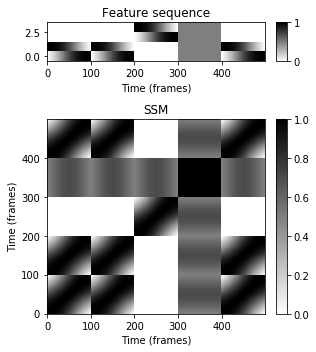

In [1]:
import numpy as np
import os, sys, librosa
from scipy import signal
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import IPython.display as ipd
import pandas as pd
from numba import jit

sys.path.append('..')
import LibFMP.B
import LibFMP.C2
import LibFMP.C3
import LibFMP.C4
import LibFMP.C6

%matplotlib inline

# Generate normalized feature sequence
K = 4
M = 100
r = np.arange(M)
b1 = np.zeros((K,M))
b1[0,:] = r
b1[1,:] = M-r
b2 = np.ones((K,M))
X = np.concatenate(( b1, b1, np.roll(b1, 2, axis=0), b2, b1 ), axis=1)
X = LibFMP.C3.normalize_feature_sequence(X, norm='2', threshold=0.001)

# Compute SSM
S = np.dot(np.transpose(X), X)

# Visualization
cmap = 'gray_r'
fig, ax = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1, 0.05], 
                                          'height_ratios': [0.2, 1]}, figsize=(4.5, 5))
LibFMP.B.plot_matrix(X, Fs=1, ax=[ax[0,0], ax[0,1]], cmap=cmap,
            xlabel='Time (frames)', ylabel='', title='Feature sequence')
LibFMP.B.plot_matrix(S, Fs=1, ax=[ax[1,0], ax[1,1]], cmap=cmap,
            title='SSM', xlabel='Time (frames)', ylabel='Time (frames)', colorbar=True);
plt.tight_layout()

The visual appearance can be changed by suitable adjusting the colormap. For example shifting the color distribution towards lighter colors enhances the path structure in the visualization. 

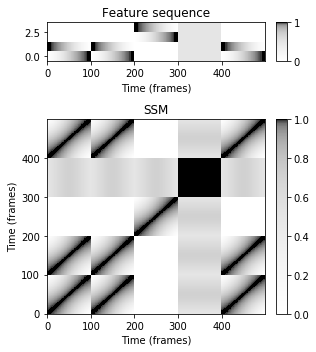

In [2]:
cmap = LibFMP.B.compressed_gray_cmap(alpha=-1000)
fig, ax = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1, 0.05], 
                                          'height_ratios': [0.2, 1]}, figsize=(4.5, 5))
LibFMP.B.plot_matrix(X, Fs=1, ax=[ax[0,0], ax[0,1]], cmap=cmap,
            xlabel='Time (frames)', ylabel='', title='Feature sequence')
LibFMP.B.plot_matrix(S, Fs=1, ax=[ax[1,0], ax[1,1]], cmap=cmap,
            title='SSM', xlabel='Time (frames)', ylabel='Time (frames)', colorbar=True);
plt.tight_layout()

## Block and Path Structures

The two most prominent structures in SSMs, as already shown in the previous example, are referred to as **blocks** and **paths**. If the feature sequence captures musical properties that stay somewhat constant over the duration of an entire musical part, each of the feature vectors is similar to all other feature vectors within this segment. As a result, an entire **block** of large values appears in the SSM. In other words, **homogeneity properties correspond to block-like structures**. If the feature sequence contains two repeating subsequences (e.g., two segments corresponding to the same melody), the corresponding elements of the two subsequences are similar to each other. As a result, a **path** (or **stripe**) of high similarity running parallel to the main diagonal becomes visible in the SSM. In other words, **repetitive properties correspond to path-like structures**.

As an example, the following figure shows an idealized SSM for the [Hungarian Dance No. 5 by Johannes Brahms](../C4/C4S1_MusicStructureGeneral.html), which has the musical structure $A_1A_2B_1B_2CA_3B_3B_4D$. Assuming that the three repeating $A$-part segments are homogeneous, the SSM has a quadratic block relating the segment corresponding to $A_1A_2$ to itself and another quadratic block relating the $A_3$-part segment to itself. Furthermore, there are two rectangular blocks, one relating the $A_1A_2$-part segment to the $A_3$-part segment and the other relating the $A_3$-part segment to the $A_1A_2$-part segment. In case that the three repeating $A$-part segments are not homogeneous, the SSM reveals path structures that run (more or less) parallel to the main diagonal. For example, there is a path with large similarity values relating $A_1$ with $A_2$ and one relating $A_1$ with $A_3$.

<img src="../data/C4/FMP_C4_F07a.png" width="250px" align="middle" alt="FMP_C4_F07a.png">

## SSM Based on Chromagram Features

The following code generates an SSM from a recording of Brahms' Hungarian Dance using a [**chromagram**](../C3/C3S1_SpecLogFreq-Chromagram.html) as a feature representation. In the visualization, large values of $\mathbf{S}$ are indicated by dark gray and small values by light gray. Actually, the SSM obtained in this case resembles the idealized SSM to a large extent. The block-like structures corresponding to $A$-part segments indicate that these segments are quite homogeneous with respect to harmony. The same holds for the $C$-part segment. Furthermore, the small similarity values outside the $C$-part block (i.e., all cells relating the $C$-part frames to frames of other segments) show that the $C$-part segment is harmonically more or less 
unrelated to all other parts. For the $B$-part segments, there are path-like structures and no block-like structures. This shows that the $B$-part segments share the same harmonic progression (i.e., are repetitions with regard to harmony), but are not homogeneous with respect to harmony. 
<!--An interesting observation is that, even though repeating, the $B$-part segments are played in different tempi and therefore have different lengths. For example, the shorter $B_2$-section is played faster than the $B_1$-section. As a result, the corresponding path does not run exactly parallel to the main diagonal. The gradient of the path indicates the relative tempo difference between the two related segments.--> 

<!-- <img src="../data/C4/FMP_C4_F07b.png" width="280px" align="middle" alt="FMP_C4_F07b.png"> -->

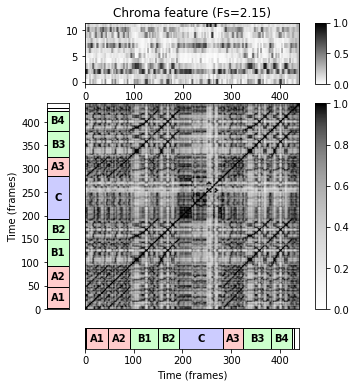

In [3]:
@jit(nopython=True)
def compute_SM_dot(X,Y):
    """Computes similarty matrix from feature sequences using dot (inner) product
    Notebook: C4/C4S2_SSM.ipynb
    """    
    S = np.dot(np.transpose(X), Y)    
    return S

def plot_feature_SSM(X, Fs_X, S, Fs_S, ann, duration, color_ann=None, 
                               title='', label='Time (seconds)', time=True, 
                               figsize=(5, 6), fontsize=10, clim_X=None, clim=None):
    """Plot SSM along with feature representation and annotations (standard setting is time in seconds)
    Notebook: C4/C4S2_SSM.ipynb
    """ 
    cmap = LibFMP.B.compressed_gray_cmap(alpha=-10)
    fig, ax = plt.subplots(3, 3, gridspec_kw={'width_ratios': [0.1, 1, 0.05], 
                           'wspace': 0.2,                 
                           'height_ratios': [0.3, 1, 0.1]}, 
                           figsize=figsize)        
    LibFMP.B.plot_matrix(X, Fs=Fs_X, ax=[ax[0,1], ax[0,2]], clim=clim_X, 
                         xlabel='', ylabel='', title=title)    
    ax[0,0].axis('off')
    LibFMP.B.plot_matrix(S, Fs=Fs_S, ax=[ax[1,1], ax[1,2]], cmap=cmap, clim=clim,
                         title='', xlabel='', ylabel='', colorbar=True);
    ax[1,1].set_xticks([])
    ax[1,1].set_yticks([])     
    LibFMP.B.plot_segments(ann, ax=ax[2,1], time_axis=True, fontsize=fontsize, 
                           colors=color_ann, 
                           time_label=label, time_max=duration*Fs_X)
    ax[2,2].axis('off'), ax[2,0].axis('off')
    LibFMP.B.plot_segments(ann, ax=ax[1,0], time_axis=True, fontsize=fontsize,
                           direction='vertical', colors=color_ann, 
                           time_label=label, time_max=duration*Fs_X)
    return fig, ax

# Waveform
fn_wav = os.path.join('..', 'data', 'C4', 'FMP_C4_Audio_Brahms_HungarianDances-05_Ormandy.wav')
Fs = 22050
x, Fs = librosa.load(fn_wav, Fs) 
x_duration = (x.shape[0])/Fs

# Chroma Feature Sequence
N, H = 4096, 1024
chromagram = librosa.feature.chroma_stft(y=x, sr=Fs, tuning=0, norm=2, hop_length=H, n_fft=N)
X, Fs_X = LibFMP.C3.smooth_downsample_feature_sequence(chromagram, Fs/H, filt_len=41, down_sampling=10)

# Annotation
filename = 'FMP_C4_Audio_Brahms_HungarianDances-05_Ormandy.csv'
fn_ann = os.path.join('..', 'data', 'C4', filename)
ann, color_ann = LibFMP.C4.read_structure_annotation(fn_ann, fn_ann_color=filename)
ann_frames = LibFMP.C4.convert_structure_annotation(ann, Fs=Fs_X) 

# SSM 
X = LibFMP.C3.normalize_feature_sequence(X, norm='2', threshold=0.001)
S = compute_SM_dot(X,X)
fig, ax = plot_feature_SSM(X, 1, S, 1, ann_frames, x_duration*Fs_X, color_ann=color_ann,
                           clim_X=[0,1], clim=[0,1], label='Time (frames)',
                           title='Chroma feature (Fs=%0.2f)'%Fs_X)

## SSM Based on MFCC Features

Next, we compute an SSM on the basis of [**MFCC features**](../C4/C4S1_MusicStructureGeneral.html). Using all $K=20$ MFCC coefficients of this representation results in an SSM that mainly possesses block-like structures. In particular, one can observe blocks that roughly correspond to the $A$-parts and the the $C$-part. Actually, the block structure is dominated by the first two (lower) coefficients of the MFCC features. Only considering the coefficients $4$ to $14$ results in an SSM that has finer block structures and also reveals path-like structures.

**Important notes:**
* Before computing the SSM, we applied some [**smoothing** by applying an averaging filter with subsequent **downsampling**](../C3/C3S1_FeatureSmoothing.html). The smoothing suppresses small local fluctuations in the feature sequence and may have a significant effect on the resulting SSM. 
* Note that downsampling the feature sequence by a factor $H$, increases the efficiency by factor of $H^2$ when computing the SSM $\mathbf{S}$.
* Since the values of the MFCC features may be negative, also the SSM values may be negative (in the interval $[1,-1]$ after normalizing the MFCC features).


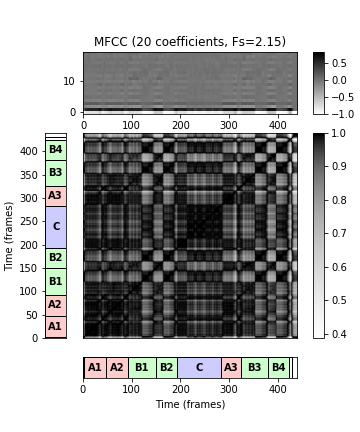
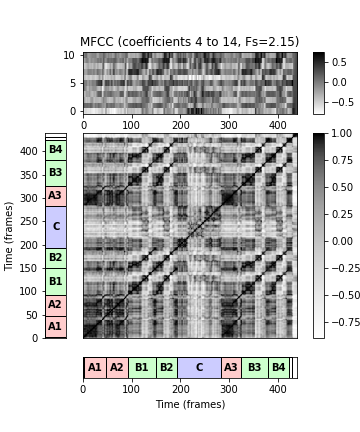

In [4]:
from LibFMP.B import FloatingBox
float_box = LibFMP.B.FloatingBox()

# MFCC-based feature sequence
N, H = 2048, 1024
X_MFCC = librosa.feature.mfcc(y=x, sr=Fs, hop_length=H, n_fft=N)
coef = np.arange(0,20)
X_MFCC_upper = X_MFCC[coef,:]
X, Fs_X = LibFMP.C3.smooth_downsample_feature_sequence(X_MFCC_upper, Fs/H, filt_len=41, down_sampling=10)
X = LibFMP.C3.normalize_feature_sequence(X, norm='2', threshold=0.001)
S = compute_SM_dot(X,X)
ann_frames = LibFMP.C4.convert_structure_annotation(ann, Fs=Fs_X) 
fig, ax = plot_feature_SSM(X, 1, S, 1, ann_frames, x_duration*Fs_X, color_ann=color_ann,
    title='MFCC (20 coefficients, Fs=%0.2f)'%Fs_X, label='Time (frames)')
float_box.add_fig(fig)


# MFCC-based feature sequence only using coefficients 4 to 14
coef = np.arange(4,15)
X_MFCC_upper = X_MFCC[coef,:]
X, Fs_X = LibFMP.C3.smooth_downsample_feature_sequence(X_MFCC_upper, Fs/H, filt_len=41, down_sampling=10)
X = LibFMP.C3.normalize_feature_sequence(X, norm='2', threshold=0.001)
S = compute_SM_dot(X,X)
ann_frames = LibFMP.C4.convert_structure_annotation(ann, Fs=Fs_X) 
fig, ax = plot_feature_SSM(X, 1, S, 1, ann_frames, x_duration*Fs_X, 
                           color_ann=color_ann, label='Time (frames)',
                           title='MFCC (coefficients 4 to 14, Fs=%0.2f)'%Fs_X)
float_box.add_fig(fig)

float_box.show()

## SSM Based on Tempogram Features

Finally, we compute an SSM using a [**cyclic Fourier tempogram**](../C6/C6S2_TempogramCyclic.html) as the underlying feature representation. Compared to the chroma-based SSM, the structure of the tempogram-based SSM is not so clear. At least, one can observe a block that corresponds to the $C$-part segment, thus emphasizing its contrasting role. Furthermore, the SSM indicates the many tempo changes occurring in this music recording.

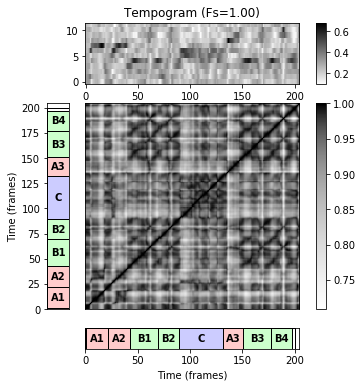

In [5]:
# Tempogram feature sequence
nov, Fs_nov = LibFMP.C6.compute_novelty_spectrum(x, Fs=Fs, N=2048, H=512, gamma=100, M=10, norm=1)
nov, Fs_nov = LibFMP.C6.resample_signal(nov, Fs_in=Fs_nov, Fs_out=100)


N, H = 1000, 100
X, T_coef, F_coef_BPM = LibFMP.C6.compute_tempogram_Fourier(nov, Fs_nov, N=N, H=H, Theta=np.arange(30,601))
octave_bin = 12
tempogram_F = np.abs(X)
output = LibFMP.C6.compute_cyclic_tempogram(tempogram_F, F_coef_BPM, octave_bin=octave_bin)
X = output[0]
F_coef_scale = output[1]
Fs_X = Fs_nov/H
X = LibFMP.C3.normalize_feature_sequence(X, norm='2', threshold=0.001)
S = compute_SM_dot(X,X)
ann_frames = LibFMP.C4.convert_structure_annotation(ann, Fs=Fs_X) 
fig, ax = plot_feature_SSM(X, 1, S, 1, ann_frames, x_duration*Fs_X, color_ann=color_ann,
    title='Tempogram (Fs=%0.2f)'%Fs_X, label='Time (frames)')

## Formal Definition of Paths and Blocks

We formally define a **segment** to be a set $\alpha=[s:t]\subseteq [1:N]$ specified by its starting point $s$ and its end point $t$ (given in terms of feature indices). Let 

\begin{equation}
    |\alpha|:=t-s+1
\end{equation}

denote the length of $\alpha$. Next, a **path** over $\alpha$ of length $L$ is a sequence

\begin{equation}
   P=((n_1,m_1), \ldots,(n_L,m_L))
\end{equation}   

of cells $(n_\ell,m_\ell)\in[1:N]^2$, $\ell\in[1:L]$, satisfying $m_1=s$ and $m_L=t$ (**boundary condition**) and $(n_{\ell+1},m_{\ell+1}) -(n_\ell,m_\ell)\in \Sigma$ (**step size condition**), where $\Sigma$ denotes a set of admissible step sizes. Note that this definition is very similar to the one of a [warping path](../C3/C3S2_DTWbasic.html) (see Section 3.2.1.1 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>). In the case of $\Sigma = \{(1,1)\}$, one obtains paths that are strictly diagonal. In the following, we typically use the set $\Sigma = \{(2,1),(1,2),(1,1)\}$. For a path $P$, one can associate two segments defined by the projections $\pi_1(P):=[n_1:n_L]$ and $\pi_2(P):=[m_1:m_L]$, respectively. The boundary condition enforces $\pi_2(P)=\alpha$. The other segment $\pi_1(P)$ is referred to as the **induced segment**. The **score** $\sigma(P)$ of $P$ is defined as

\begin{equation}
\sigma(P) := \sum_{\ell=1}^L \mathbf{S}(n_\ell,m_\ell).
\end{equation}

Note that each path over the segment $\alpha$ encodes a relation between $\alpha$ and an induced segment, where the score $\sigma(P)$ yields a quality measure for this relation. For blocks, we also introduce corresponding notions. 
A **block** over a segment $\alpha=[s:t]$ is a subset 

\begin{equation}
   B=\alpha' \times \alpha \subseteq [1:N]\times [1:N]
\end{equation}

for some segment $\alpha'=[s':t']$. Similar as for a path, we define the two projections $\pi_1(B)=\alpha'$ and $\pi_2(B)=\alpha$ for the block $B$ and call $\alpha'$ the **induced segment**. Furthermore, we define the score of block $B$ by

\begin{equation}
\sigma(B)=\sum_{(n,m)\in B}\mathbf{S}(n,m).
\end{equation}

The formal definition of paths and blocks is summarized by the following figure:

<img src="../data/C4/FMP_C4_F08.png" width="500px" align="middle" alt="FMP_C4_F08.png">


Based on paths and blocks, one can consider different kinds of similarity relations between segments. We say that a segment $\alpha_1$ is **path-similar** to a segment $\alpha_2$, if there is a path $P$ of high score with $\pi_1(P)=\alpha_1$ and  $\pi_2(P)=\alpha_2$. Similarly, $\alpha_1$ is **block-similar** to $\alpha_2$, if there is a block $B$ of high score with $\pi_1(B)=\alpha_1$ and $\pi_2(B)=\alpha_2$. Obviously, in case that the similarity measure $s$ is symmetric, both the self-similarity matrix $\mathbf{S}$ and the above-defined similarity relations between segments are symmetric as well. Another important property of a similarity relation is **transitivity**, i.e., if a segment $\alpha_1$ is similar to a segment $\alpha_2$ and segment $\alpha_2$ is similar to a segment $\alpha_3$, then $\alpha_1$ should also be similar to $\alpha_3$ (at least to a certain degree). Also this property holds for path- and block-similarity in case that the similarity measure $s$ has this property. As a consequence, path and block structures often appear in groups that fulfill certain symmetry and transitivity properties&mdash;at least in the ideal case. 

## Overall Procedure for Music Structure Analysis

Most computational approaches to music structure analysis exploit path- and block-like structures of SSMs in one way or another, and the overall algorithmic pipelines typically contain the following general steps:

* The music signal is transformed into a suitable feature sequence.
* A self-similarity matrix is computed from the feature sequence based on a similarity measure.
* Blocks and paths of high overall score are derived from the SSM. Each block or path defines a pair of similar segments.
* Entire groups of mutually similar segments are formed from the pairwise relations by applying a clustering step.

The last step can be considered as forming a kind of transitive closure of the pairwise segment relations induced by block and path structures.

## Further Notes


In the Brahms example, the musical structure can be explained well by its repetitive structure. In the above figures, these structures become visible in particular when using a chroma-based SSM. In the subsequent notebooks, we will mainly focus on chroma-based features to illustrate music structure analysis approaches. Of course, many techniques can also be applied on SSMs obtained from other feature representations. In the literature, often a combination of various feature types is used. Besides the feature type, there are many ways for enhancing structural properties of SSM. In the following notebooks, we will cover the following enhancement and postprocessing strategies:

* [Feature smoothing](../C4/C4S2_SSM-FeatureSmoothing.html)
* [Path enhancement](../C4/C4S2_SSM-PathEnhancement.html)
* [Transposition invariance](../C4/C4S2_SSM-TranspositionInvariance.html)
* [Thresholding](../C4/C4S2_SSM-Thresholding.html)

The following figure gives an overview of the various strategies that can be applied when computing an SSM.

<img src="../data/C4/FMP_C4_F09.png" width="500px" align="middle" alt="FMP_C4_F09.png">

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a>.
</div> 

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>